In [1]:
from data.generator import dgf6, dgf7, dgf8, dgf9

In [2]:
# All four Data Generating Function (dgf) returns same sampling format.

X, y = dgf9()
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [3]:
X.shape, y.shape

((1000,), (1000,))

## Data Generator



In [4]:
import matplotlib.pyplot as plt
import numpy as np

# timeline with length (cycle) 2 Pi. 100 segments.
t = np.linspace(0, 2 * np.pi, 100)
t.shape

(100,)

#### Segments in a Timeline

Place time in x-axis. Cycle set to two PI. Partition the plot into number of segments.

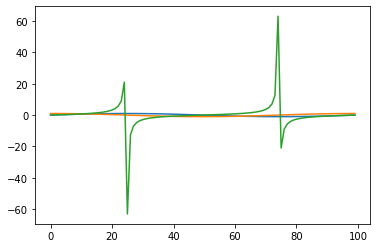

In [5]:
plt.plot(np.sin(t))
plt.plot(np.cos(t))
plt.plot(np.tan(t))

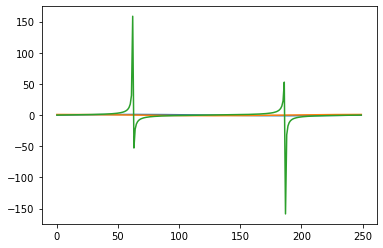

In [6]:
# Change timeline to 250 segments

tl2 = np.linspace(0, 2 * np.pi, 250)
plt.plot(np.sin(tl2))
plt.plot(np.cos(tl2))
plt.plot(np.tan(tl2))

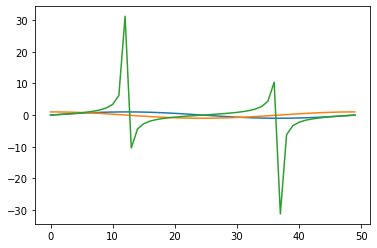

In [7]:
# Change timeline to 50 segments

t = np.linspace(0, 2 * np.pi, 50)
plt.plot(np.sin(t))
plt.plot(np.cos(t))
plt.plot(np.tan(t))

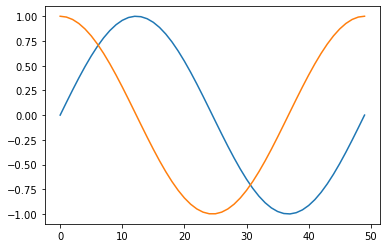

In [8]:
plt.plot(np.sin(t))
plt.plot(np.cos(t))

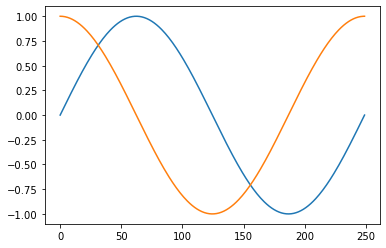

In [9]:
plt.plot(np.sin(tl2))
plt.plot(np.cos(tl2))

In [10]:
# 20 is enough. It fits a PowerPoint slide.

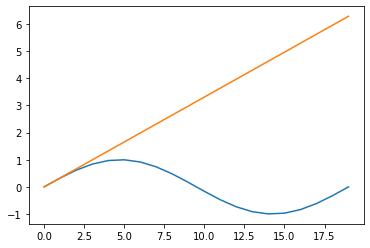

In [18]:
t = np.linspace(0, 2*np.pi, 20)
plt.plot(np.sin(t))
plt.plot(t)

In [22]:
gamma = np.arange(0, 20) * 0.25
gamma

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75])

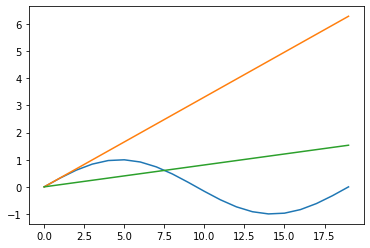

In [24]:
l = t - gamma

plt.plot(np.sin(t))
plt.plot(t)
plt.plot(l)

In [28]:
# series:  l, np.cos(t), np.sin(t)

np.cos(t).var(), np.cos(t).mean()

(0.5225, 0.04999999999999995)

In [29]:
np.sin(t).var(), np.sin(t).mean()

(0.475, 9.9579925010296e-18)

In [30]:
l.var(), l.mean()

(0.21650789872446752, 0.7665926535897931)

In [31]:
collect = [np.cos(t), np.sin(t), l]

# Pearson's correlation coefficient.

In [33]:
# Pearson product-moment correlation coefficients.
# https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

np.corrcoef(np.sin(t), np.cos(t))

array([[1.00000000e+00, 8.71244045e-17],
       [8.71244045e-17, 1.00000000e+00]])

In [36]:
frame = np.stack([np.sin(t), np.cos(t)])
frame.shape # two rows, 20 observations in each row.

(2, 20)

In [38]:
# https://numpy.org/doc/stable/reference/generated/numpy.cov.html#numpy.cov

# A 1-D or 2-D array containing multiple variables and observations. Each row of m represents a variable, and each column a single observation of all those variables. 

np.cov(frame)

array([[5.00000000e-01, 4.56884232e-17],
       [4.56884232e-17, 5.50000000e-01]])

## Calculating Pearson Correlation Coefficient in Python with Numpy

https://stackabuse.com/calculating-pearson-correlation-coefficient-in-python-with-numpy/

The Pearson correlation coefficient measures the linear association between variables. Its value can be interpreted like so:

+1 - Complete positive correlation  
+0.8 - Strong positive correlation  
+0.6 - Moderate positive correlation  
0 - no correlation whatsoever  
-0.6 - Moderate negative correlation  
-0.8 - Strong negative correlation  
-1 - Complete negative correlation  


The Pearson's Correlation Coefficient is also known as the Pearson Product-Moment Correlation Coefficient. It is a measure of the linear relationship between two random variables - X and Y. 

Mathematically, if (σXY) is the covariance between X and Y, and (σX) is the standard deviation of X, then the Pearson's correlation coefficient ρ is given by:



In [39]:
x_simple = np.array([-2, -1, 0, 1, 2])
y_simple = np.array([4, 1, 3, 2, 0])
my_rho = np.corrcoef(x_simple, y_simple)

print(my_rho)

[[ 1.  -0.7]
 [-0.7  1. ]]


In [40]:
# the ones on the diagonals, indicating that the correlation coefficient of a variable with itself is one

In [41]:

# Then, we can call vstack() to vertically stack other arrays to it.

seed = 13
rand = np.random.RandomState(seed)

x = rand.uniform(0,1,100)
x = np.vstack((x,x*2+1))
x = np.vstack((x,-x[0,]*2+1))
x = np.vstack((x,rand.normal(1,3,100)))

In [42]:
x.shape

(4, 100)

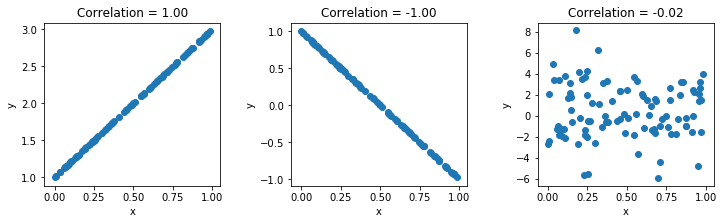

In [43]:
rho = np.corrcoef(x)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
for i in [0,1,2]:
    ax[i].scatter(x[0,],x[1+i,])
    ax[i].title.set_text('Correlation = ' + "{:.2f}".format(rho[0,i+1]))
    ax[i].set(xlabel='x',ylabel='y')
fig.subplots_adjust(wspace=.4)    
plt.show()

In [44]:
# calculating the correlation coefficients on each step

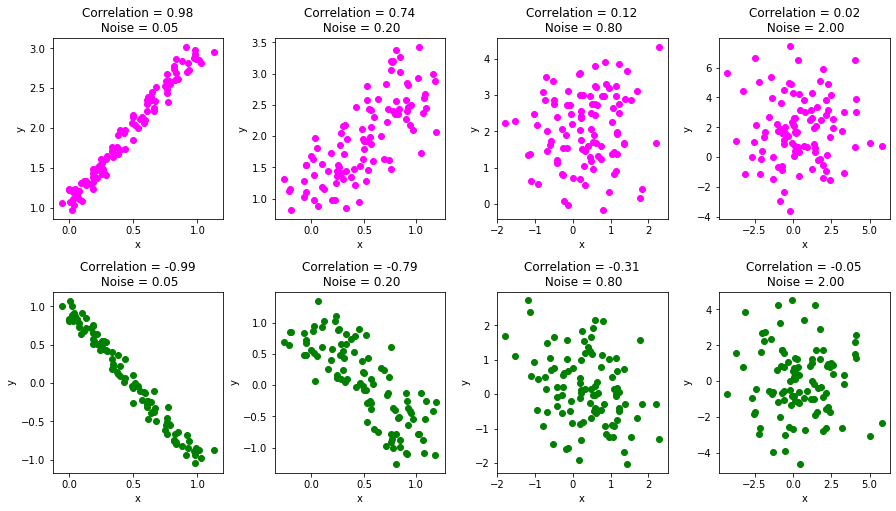

In [45]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

for noise, i in zip([0.05,0.2,0.8,2],[0,1,2,3]):
    # Add noise
    x_with_noise = x+rand.normal(0,noise,x.shape)
    
    # Compute correlation
    rho_noise = np.corrcoef(x_with_noise)
    
    # Plot column wise. Positive correlation in row 0 and negative in row 1
    ax[0,i].scatter(x_with_noise[0,],x_with_noise[1,],color='magenta')
    ax[1,i].scatter(x_with_noise[0,],x_with_noise[2,],color='green')
    ax[0,i].title.set_text('Correlation = ' + "{:.2f}".format(rho_noise[0,1])
                        + '\n Noise = ' + "{:.2f}".format(noise) )
    ax[1,i].title.set_text('Correlation = ' + "{:.2f}".format(rho_noise[0,2])
                        + '\n Noise = ' + "{:.2f}".format(noise))
    ax[0,i].set(xlabel='x',ylabel='y')    
    ax[1,i].set(xlabel='x',ylabel='y')
    
fig.subplots_adjust(wspace=0.3,hspace=0.4)    
plt.show()

# A Common Pitfall: Associations with no Correlation

zero correlation implies no association. Let's clarify that correlation strictly measures the linear relationship between two variables.

The examples below show variables which are non-linearly associated with each other but have zero correlation.

The last example of (y=ex) has a correlation coefficient of around 0.52, which is again not a reflection of the true association between the two variables

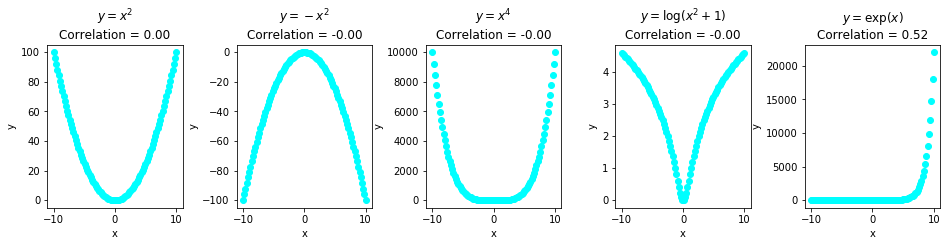

In [47]:
# Create a data matrix
x_nonlinear = np.linspace(-10,10,100)
x_nonlinear = np.vstack((x_nonlinear,x_nonlinear*x_nonlinear))
x_nonlinear = np.vstack((x_nonlinear,-x_nonlinear[0,]**2))
x_nonlinear = np.vstack((x_nonlinear,x_nonlinear[0,]**4))
x_nonlinear = np.vstack((x_nonlinear,np.log(x_nonlinear[0,]**2+1)))
x_nonlinear = np.vstack((x_nonlinear,np.exp(x_nonlinear[0,])))

# Compute the correlation
rho_nonlinear = np.corrcoef(x_nonlinear)

# Plot the data
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16, 3))
title = ['$y=x^2$','$y=-x^2$','$y=x^4$','$y=\log(x^2+1)$','$y=\exp(x)$']
for i in [0,1,2,3,4]:
    ax[i].scatter(x_nonlinear[0,],x_nonlinear[1+i,],color='cyan')
    ax[i].title.set_text(title[i] + '\n' + 
                         'Correlation = ' + "{:.2f}".format(rho_nonlinear[0,i+1]))
    ax[i].set(xlabel='x',ylabel='y')
fig.subplots_adjust(wspace=.4)    
plt.show()

Conclusions

If random variables have high linear associations then their correlation coefficient is close to +1 or -1. On the other hand, statistically independent variables have correlation coefficients close to zero.